In [1]:
 pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [202]:
pip install wordcloud

In [119]:
#importing libraries
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re





#for model building
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from wordcloud import WordCloud 
from sklearn.preprocessing import StandardScaler


from sklearn.cluster import MiniBatchKMeans

from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve , auc, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score




# Part 1 ( Data Visualization)

In [2]:
df = pd.read_csv("C:/Users/Naman Kapoor/Downloads/Exertis_Technical_Task/anon_data.csv")
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName
0,100002803,0002913843,10,02/04/2021,2,Microsoft,Operating System Software,1000477.0,254.213782,1.271048,0.0,Components North
1,100003323,0002918083,50,02/04/2021,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.0,Corporate North
2,100016168,0002916878,20,02/04/2021,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.0,Corporate North
3,100001590,0002470475,10,02/04/2021,10,Lenovo,Notebook Computers,1000133.0,21362.979644,133.944138,0.0,Corporate South
4,100001590,0002544987,10,02/04/2021,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.0,Corporate South
...,...,...,...,...,...,...,...,...,...,...,...,...
488706,100010912,60584191.0,10,10/03/2023,-1,Lightwave RF,Smart Home Lighting,1000592.0,-53.174831,-4.746284,0.0,SMB 1 North
488707,100013325,60583918.0,10,10/03/2023,-1,Sandisk Professional,Desktop HDD,1000043.0,-137.487216,-9.413256,0.0,Components North
488708,100014212,60584292.0,10,10/03/2023,-1,Epson,Ink Cartridges,1000056.0,-136.971448,-11.899225,0.0,Office Automation
488709,100015609,60584541.0,10,10/03/2023,-1,Zanussi,Vacuum Cleaners,1002099.0,-50.589045,10.080643,0.0,Corporate North


In [3]:
df.head(10)

,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName
0,100002803,0002913843,10,02/04/2021,2,Microsoft,Operating System Software,1000477.0,254.213782,1.271048,0.0,Components North
1,100003323,0002918083,50,02/04/2021,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.0,Corporate North
2,100016168,0002916878,20,02/04/2021,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.0,Corporate North
3,100001590,0002470475,10,02/04/2021,10,Lenovo,Notebook Computers,1000133.0,21362.979644,133.944138,0.0,Corporate South
4,100001590,0002544987,10,02/04/2021,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.0,Corporate South
5,100001590,0002601213,30,02/04/2021,3,Lenovo,Notebook Computers,1000133.0,5860.142208,36.556402,0.0,Corporate South
6,100001590,0002670696,40,02/04/2021,2,Lenovo,Notebook Computers,1000133.0,725.877833,4.926094,0.0,Corporate South
7,100001590,0002670712,40,02/04/2021,2,Lenovo,Notebook Computers,1000133.0,714.169759,5.154048,0.0,Corporate South
8,100001590,0002676161,10,02/04/2021,32,Lenovo,Workstations,1000133.0,22953.508621,228.557134,0.0,Corporate South
9,100001590,0002682159,70,02/04/2021,5,Lenovo,Notebook Computers,1000133.0,1946.224631,12.467771,0.0,Corporate South


In [4]:
df.isna().sum()


CustomerId                 0
SalesOrderNumber           0
SalesOrderLineNumber       0
ShipDate                   0
Qty                        0
Brand                     81
ProductType               81
ProductSupplierID       2288
Revenue                    0
Profit                     0
Freight cost               0
SalesTeamName              0
dtype: int64

In [5]:
#removing the null values
df = df.dropna()
df

,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName
0,100002803,0002913843,10,02/04/2021,2,Microsoft,Operating System Software,1000477.0,254.213782,1.271048,0.0,Components North
1,100003323,0002918083,50,02/04/2021,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.0,Corporate North
2,100016168,0002916878,20,02/04/2021,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.0,Corporate North
3,100001590,0002470475,10,02/04/2021,10,Lenovo,Notebook Computers,1000133.0,21362.979644,133.944138,0.0,Corporate South
4,100001590,0002544987,10,02/04/2021,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.0,Corporate South
...,...,...,...,...,...,...,...,...,...,...,...,...
488706,100010912,60584191.0,10,10/03/2023,-1,Lightwave RF,Smart Home Lighting,1000592.0,-53.174831,-4.746284,0.0,SMB 1 North
488707,100013325,60583918.0,10,10/03/2023,-1,Sandisk Professional,Desktop HDD,1000043.0,-137.487216,-9.413256,0.0,Components North
488708,100014212,60584292.0,10,10/03/2023,-1,Epson,Ink Cartridges,1000056.0,-136.971448,-11.899225,0.0,Office Automation
488709,100015609,60584541.0,10,10/03/2023,-1,Zanussi,Vacuum Cleaners,1002099.0,-50.589045,10.080643,0.0,Corporate North


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486423 entries, 0 to 488710
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CustomerId            486423 non-null  int64  
 1   SalesOrderNumber      486423 non-null  object 
 2   SalesOrderLineNumber  486423 non-null  int64  
 3   ShipDate              486423 non-null  object 
 4   Qty                   486423 non-null  object 
 5   Brand                 486423 non-null  object 
 6   ProductType           486423 non-null  object 
 7   ProductSupplierID     486423 non-null  float64
 8   Revenue               486423 non-null  float64
 9   Profit                486423 non-null  float64
 10  Freight cost          486423 non-null  float64
 11  SalesTeamName         486423 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 48.2+ MB


In [7]:
df.describe()

,CustomerId,SalesOrderLineNumber,ProductSupplierID,Revenue,Profit,Freight cost
count,4.864230e+05,486423.000000,4.864230e+05,4.864230e+05,486423.000000,486423.000000
mean,1.000059e+08,17.884078,1.000145e+06,9.582982e+02,32.888654,7.275840
std,4.433975e+03,27.338943,2.200137e+02,6.775005e+03,657.357275,36.188917
min,1.000000e+08,1.000000,1.000002e+06,-4.213631e+05,-82602.473317,-46.010000
25%,1.000021e+08,10.000000,1.000033e+06,3.330815e+01,1.169409,0.960000
50%,1.000045e+08,10.000000,1.000056e+06,1.313865e+02,4.860684,4.540000
75%,1.000080e+08,10.000000,1.000171e+06,4.922393e+02,16.196966,4.890000
max,1.000246e+08,1120.000000,1.002440e+06,1.004398e+06,271469.318895,7625.320000


In [8]:
df.shape

(486423, 12)

In [9]:
#dropping the meta data columns
df1 = df.drop(['CustomerId','ProductSupplierID','SalesOrderNumber','SalesOrderLineNumber'],axis = 1)


In [10]:

df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,Freight cost,SalesTeamName
0,02/04/2021,2,Microsoft,Operating System Software,254.213782,1.271048,0.0,Components North
1,02/04/2021,1,Microsoft,Utilities Software,191.682001,6.179373,0.0,Corporate North
2,02/04/2021,1,Unknown,IT Support Services,0.000000,-8.011783,0.0,Corporate North
3,02/04/2021,10,Lenovo,Notebook Computers,21362.979644,133.944138,0.0,Corporate South
4,02/04/2021,5,Lenovo,Notebook Computers,4344.370602,27.639497,0.0,Corporate South
...,...,...,...,...,...,...,...,...
488706,10/03/2023,-1,Lightwave RF,Smart Home Lighting,-53.174831,-4.746284,0.0,SMB 1 North
488707,10/03/2023,-1,Sandisk Professional,Desktop HDD,-137.487216,-9.413256,0.0,Components North
488708,10/03/2023,-1,Epson,Ink Cartridges,-136.971448,-11.899225,0.0,Office Automation
488709,10/03/2023,-1,Zanussi,Vacuum Cleaners,-50.589045,10.080643,0.0,Corporate North


In [11]:
df1['Qty'].unique()

array(['2', '1', '10', '5', '3', '32', '4', '64', '21', '22', '11', '6',
       '8', '-1', '30', '120', '36', '12', '40', '-9', '-10', '150',
       '704', '-5', '-3', '7', '50', '37', '200', '90', '20', '14', '-8',
       '16', '52', '84', '-4', '15', '-2', '100', '9', '53', '25', '152',
       '170', '300', '-28', '400', '350', '56', '60', '500', '1,000',
       '26', '-35', '208', '13', '-30', '-19', '190', '58', '54', '18',
       '-27', '-7', '80', '49', '428', '23', '250', '108', '24', '68',
       '31', '-25', '-6', '41', '110', '35', '45', '57', '38', '-20',
       '28', '96', '74', '29', '235', '44', '792', '2,000', '-188', '-53',
       '113', '124', '89', '91', '-11', '-15', '-14', '-17', '-12', '-13',
       '33', '19', '102', '-40', '101', '131', '140', '-117', '-80', '17',
       '51', '62', '-16', '48', '174', '173', '75', '284', '117', '114',
       '109', '83', '-920', '70', '95', '-36', '-203', '67', '76', '47',
       '55', '306', '34', '46', '144', '39', '-200', '71

In [12]:
df1['Freight cost'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#removing freight cost columns since all the enteries are 0.
df1 = df1.drop(['Freight cost'],axis = 1)

In [14]:
df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,SalesTeamName
0,02/04/2021,2,Microsoft,Operating System Software,254.213782,1.271048,Components North
1,02/04/2021,1,Microsoft,Utilities Software,191.682001,6.179373,Corporate North
2,02/04/2021,1,Unknown,IT Support Services,0.000000,-8.011783,Corporate North
3,02/04/2021,10,Lenovo,Notebook Computers,21362.979644,133.944138,Corporate South
4,02/04/2021,5,Lenovo,Notebook Computers,4344.370602,27.639497,Corporate South
...,...,...,...,...,...,...,...
488706,10/03/2023,-1,Lightwave RF,Smart Home Lighting,-53.174831,-4.746284,SMB 1 North
488707,10/03/2023,-1,Sandisk Professional,Desktop HDD,-137.487216,-9.413256,Components North
488708,10/03/2023,-1,Epson,Ink Cartridges,-136.971448,-11.899225,Office Automation
488709,10/03/2023,-1,Zanussi,Vacuum Cleaners,-50.589045,10.080643,Corporate North


In [15]:
type(df1['Qty'][0])

str

In [16]:
#removing commas from the values in the 'Qty' column
df1 = df1.replace(',','', regex=True)


In [17]:
df1['Qty'].unique()

array(['2', '1', '10', '5', '3', '32', '4', '64', '21', '22', '11', '6',
       '8', '-1', '30', '120', '36', '12', '40', '-9', '-10', '150',
       '704', '-5', '-3', '7', '50', '37', '200', '90', '20', '14', '-8',
       '16', '52', '84', '-4', '15', '-2', '100', '9', '53', '25', '152',
       '170', '300', '-28', '400', '350', '56', '60', '500', '1000', '26',
       '-35', '208', '13', '-30', '-19', '190', '58', '54', '18', '-27',
       '-7', '80', '49', '428', '23', '250', '108', '24', '68', '31',
       '-25', '-6', '41', '110', '35', '45', '57', '38', '-20', '28',
       '96', '74', '29', '235', '44', '792', '2000', '-188', '-53', '113',
       '124', '89', '91', '-11', '-15', '-14', '-17', '-12', '-13', '33',
       '19', '102', '-40', '101', '131', '140', '-117', '-80', '17', '51',
       '62', '-16', '48', '174', '173', '75', '284', '117', '114', '109',
       '83', '-920', '70', '95', '-36', '-203', '67', '76', '47', '55',
       '306', '34', '46', '144', '39', '-200', '71',

In [18]:
#converting string to numeric for Qty (is it a commodity so can't be a negative)
df1['Qty'] = pd.to_numeric(df1['Qty'])

In [19]:
type(df1['Qty'][0])

numpy.int64

In [20]:
df1 = df1[df1['Qty'] >= 0]
df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,SalesTeamName
0,02/04/2021,2,Microsoft,Operating System Software,254.213782,1.271048,Components North
1,02/04/2021,1,Microsoft,Utilities Software,191.682001,6.179373,Corporate North
2,02/04/2021,1,Unknown,IT Support Services,0.000000,-8.011783,Corporate North
3,02/04/2021,10,Lenovo,Notebook Computers,21362.979644,133.944138,Corporate South
4,02/04/2021,5,Lenovo,Notebook Computers,4344.370602,27.639497,Corporate South
...,...,...,...,...,...,...,...
488249,09/03/2023,2,Epson,Ink Cartridges,100.407113,9.711315,Office Automation
488250,09/03/2023,2,Epson,Ink Cartridges,207.935562,22.125938,Office Automation
488251,09/03/2023,2,Epson,Ink Cartridges,204.008019,23.369093,Office Automation
488252,09/03/2023,2,Epson,Ink Cartridges,206.068191,19.244544,Office Automation


In [21]:
df1['Qty'].unique()

array([   2,    1,   10,    5,    3,   32,    4,   64,   21,   22,   11,
          6,    8,   30,  120,   36,   12,   40,  150,  704,    7,   50,
         37,  200,   90,   20,   14,   16,   52,   84,   15,  100,    9,
         53,   25,  152,  170,  300,  400,  350,   56,   60,  500, 1000,
         26,  208,   13,  190,   58,   54,   18,   80,   49,  428,   23,
        250,  108,   24,   68,   31,   41,  110,   35,   45,   57,   38,
         28,   96,   74,   29,  235,   44,  792, 2000,  113,  124,   89,
         91,   33,   19,  102,  101,  131,  140,   17,   51,   62,   48,
        174,  173,   75,  284,  117,  114,  109,   83,   70,   95,   67,
         76,   47,   55,  306,   34,   46,  144,   39,   71,  125,  130,
         27,  280,   43,  240,   81,  238,   66,  808,  230,   99,  112,
        201,  180,  820,  286,  132,  129,  290,  492,  890,   61,  142,
        160,   85,  202,   69,  279,  119,  127,  149,  198,   65,  686,
        226,  340,  151, 4564,   59,  424,   94,  1

In [22]:


df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,SalesTeamName
0,02/04/2021,2,Microsoft,Operating System Software,254.213782,1.271048,Components North
1,02/04/2021,1,Microsoft,Utilities Software,191.682001,6.179373,Corporate North
2,02/04/2021,1,Unknown,IT Support Services,0.000000,-8.011783,Corporate North
3,02/04/2021,10,Lenovo,Notebook Computers,21362.979644,133.944138,Corporate South
4,02/04/2021,5,Lenovo,Notebook Computers,4344.370602,27.639497,Corporate South
...,...,...,...,...,...,...,...
488249,09/03/2023,2,Epson,Ink Cartridges,100.407113,9.711315,Office Automation
488250,09/03/2023,2,Epson,Ink Cartridges,207.935562,22.125938,Office Automation
488251,09/03/2023,2,Epson,Ink Cartridges,204.008019,23.369093,Office Automation
488252,09/03/2023,2,Epson,Ink Cartridges,206.068191,19.244544,Office Automation


In [23]:
df1['SalesTeamName'].unique()

array(['Components North', 'Corporate North', 'Corporate South',
       'SMB 1 South', 'SMB 1 North', 'Office Automation',
       'DC Power North & NW', 'B2B Others'], dtype=object)

In [24]:
df1['P/L_label'] = ''
df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,SalesTeamName,P/L_label
0,02/04/2021,2,Microsoft,Operating System Software,254.213782,1.271048,Components North,
1,02/04/2021,1,Microsoft,Utilities Software,191.682001,6.179373,Corporate North,
2,02/04/2021,1,Unknown,IT Support Services,0.000000,-8.011783,Corporate North,
3,02/04/2021,10,Lenovo,Notebook Computers,21362.979644,133.944138,Corporate South,
4,02/04/2021,5,Lenovo,Notebook Computers,4344.370602,27.639497,Corporate South,
...,...,...,...,...,...,...,...,...
488249,09/03/2023,2,Epson,Ink Cartridges,100.407113,9.711315,Office Automation,
488250,09/03/2023,2,Epson,Ink Cartridges,207.935562,22.125938,Office Automation,
488251,09/03/2023,2,Epson,Ink Cartridges,204.008019,23.369093,Office Automation,
488252,09/03/2023,2,Epson,Ink Cartridges,206.068191,19.244544,Office Automation,


In [25]:
df1['P/L_label'] = np.where(df1['Profit'] > 0 , 1, 0)
#P/L label - 1 ( for profit)
#P/L label - 0 ( for loss)

In [26]:
df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,SalesTeamName,P/L_label
0,02/04/2021,2,Microsoft,Operating System Software,254.213782,1.271048,Components North,1
1,02/04/2021,1,Microsoft,Utilities Software,191.682001,6.179373,Corporate North,1
2,02/04/2021,1,Unknown,IT Support Services,0.000000,-8.011783,Corporate North,0
3,02/04/2021,10,Lenovo,Notebook Computers,21362.979644,133.944138,Corporate South,1
4,02/04/2021,5,Lenovo,Notebook Computers,4344.370602,27.639497,Corporate South,1
...,...,...,...,...,...,...,...,...
488249,09/03/2023,2,Epson,Ink Cartridges,100.407113,9.711315,Office Automation,1
488250,09/03/2023,2,Epson,Ink Cartridges,207.935562,22.125938,Office Automation,1
488251,09/03/2023,2,Epson,Ink Cartridges,204.008019,23.369093,Office Automation,1
488252,09/03/2023,2,Epson,Ink Cartridges,206.068191,19.244544,Office Automation,1


In [27]:
df1['ProductType'].unique()

array(['Operating System Software', 'Utilities Software',
       'IT Support Services', 'Notebook Computers', 'Workstations',
       'Desktop PC', 'Notebook Warranty', 'USB Graphics Adapters',
       'HDMI Cables', 'USB Cables', 'Transceiver & Media Converters',
       'Monitors', 'Teleconferencing Systems', 'Notebook Cases',
       'Mobile Phone Cases', 'Headset', 'Laser/LED Printers',
       'Keyboard and Mouse', 'Scanners', 'Smart Home Lighting',
       'Home Notebook', 'Inkjet Printers', 'Label Printers',
       'Gaming Monitor', 'AV Extenders', 'Android Tablet',
       'Ink Cartridges', 'Office Suite Software', 'Alarm Systems',
       'Gaming Notebooks', 'Computing Warranty & Support',
       'Digital Signage Accessories', 'UPS', 'Network Warranty & Support',
       'Print Warranty', 'Multimedia Projectors',
       'UPS Warranty & Support', 'Projection Screens',
       'Professional Notebook', 'Engineering Services', 'Graphics Cards',
       'Network Extenders', 'Thin Client PC', 

In [28]:


df1['Brand'].unique()

array(['Microsoft', 'Unknown', 'Lenovo', 'Dell', 'Startech', 'Poly',
       'Targus', 'Otterbox', 'Kyocera', 'Brother', 'Philips Hue', 'LG',
       'Epson', 'Acer', 'Aten', 'Samsung', 'Hannspree', 'Netatmo',
       'Razer', 'Peerless', 'Ruckus', 'Lexmark', 'Eaton', 'SAPPHIRE',
       'Dynabook', 'Exertis Professional Services', 'Gigabyte', 'Netgear',
       'Trust', 'Anker', 'Seagate', 'WD', 'TP-Link', 'Tripp Lite',
       'Zotac', 'Asus', 'iZettle', 'AddOn', 'Belkin', 'Elgato',
       'Kingston', 'Intel', 'MSI', 'Philips', 'Aver', 'Logitech', 'AOC',
       'Zagg', 'Doro', 'Plustek', 'Speck', 'Sandisk Professional',
       'Fujitsu', 'APC', 'Oki', 'TRENDnet', 'Huawei', 'Tech Air',
       'Cherry', 'PlusOptic', 'Sandisk', 'Toshiba', 'Evga', 'Kami',
       'Port Europe', 'Accuratus', 'NEC', 'HyperX', 'Dynamode', 'Corsair',
       'O2 Original', 'LocknCharge', 'Wacom', 'D-Link', 'Sony', 'STM',
       'PTZ Optics', 'Hyper', 'Coolermaster', 'Kitsound', 'Lacie', 'JBL',
       'Honor', 'Rapoo

In [29]:
df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,SalesTeamName,P/L_label
0,02/04/2021,2,Microsoft,Operating System Software,254.213782,1.271048,Components North,1
1,02/04/2021,1,Microsoft,Utilities Software,191.682001,6.179373,Corporate North,1
2,02/04/2021,1,Unknown,IT Support Services,0.000000,-8.011783,Corporate North,0
3,02/04/2021,10,Lenovo,Notebook Computers,21362.979644,133.944138,Corporate South,1
4,02/04/2021,5,Lenovo,Notebook Computers,4344.370602,27.639497,Corporate South,1
...,...,...,...,...,...,...,...,...
488249,09/03/2023,2,Epson,Ink Cartridges,100.407113,9.711315,Office Automation,1
488250,09/03/2023,2,Epson,Ink Cartridges,207.935562,22.125938,Office Automation,1
488251,09/03/2023,2,Epson,Ink Cartridges,204.008019,23.369093,Office Automation,1
488252,09/03/2023,2,Epson,Ink Cartridges,206.068191,19.244544,Office Automation,1


In [30]:
df1['SalesTeamName'].unique()

array(['Components North', 'Corporate North', 'Corporate South',
       'SMB 1 South', 'SMB 1 North', 'Office Automation',
       'DC Power North & NW', 'B2B Others'], dtype=object)

In [31]:

df2_B = df1.groupby(['Brand'])['Profit'].sum()
df2_B = pd.DataFrame(df2_B)
df2_B

,Profit
Brand,
3M,380.784297
4Cabling,24.514324
A10 Networks,23443.284882
AKG,661.814225
AOC,107259.620971
...,...
dbramante1928,10.442699
emporia,41.384227
iFrogz,-424.660379


In [32]:
df2_BP = df2_B.sort_values(by='Profit', ascending=False)
df2_BP = df2_BP.reset_index()
df2_BP

,Brand,Profit
0,Dell,2.721617e+06
1,Lenovo,2.259391e+06
2,Epson,8.820083e+05
3,Samsung,6.865683e+05
4,MSI,6.754928e+05
...,...,...
324,Blue,-6.777769e+03
325,Astro,-1.786074e+04
326,Yale,-3.961346e+04
327,Jaybird,-4.982152e+04


<BarContainer object of 5 artists>

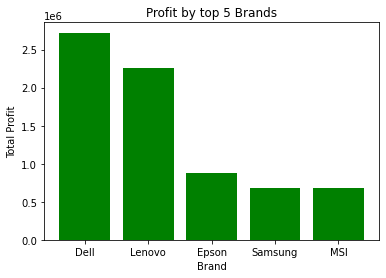

In [33]:


SMALL_SIZE = 10
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.title('Profit by top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Total Profit')
plt.bar(df2_BP['Brand'].iloc[:5], df2_BP['Profit'].iloc[:5], color = "green")


In [34]:
df2_B1 = df1.groupby(['Brand'])['Revenue'].sum()
df2_B1 = pd.DataFrame(df2_B1)
df2_B1

,Revenue
Brand,
3M,1.721255e+03
4Cabling,1.299820e+02
A10 Networks,7.771409e+04
AKG,2.047712e+03
AOC,2.753075e+06
...,...
dbramante1928,1.596627e+01
emporia,2.547332e+02
iFrogz,6.221337e+02


In [35]:
df2_BR = df2_B1.sort_values(by='Revenue', ascending=False)
df2_BR = df2_BR.reset_index()
df2_BR

,Brand,Revenue
0,Lenovo,1.482341e+08
1,Dell,9.918730e+07
2,Asus,2.140971e+07
3,Samsung,1.701212e+07
4,MSI,1.695591e+07
...,...,...
324,Foxwood,2.350441e-01
325,Cornbow,2.329615e-01
326,Dazed,1.996014e-01
327,Serif,1.638645e-01


<BarContainer object of 5 artists>

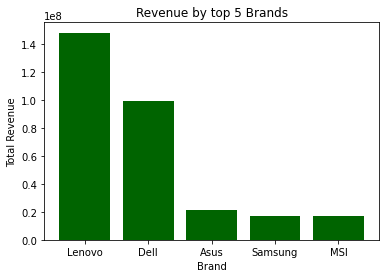

In [36]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.title('Revenue by top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.bar(df2_BR['Brand'].iloc[:5], df2_BR['Revenue'].iloc[:5], color = "darkgreen")

<BarContainer object of 5 artists>

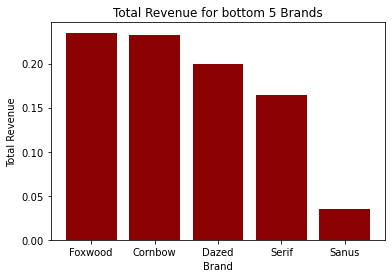

In [37]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.title('Total Revenue for bottom 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.bar(df2_BR['Brand'].iloc[-5:], df2_BR['Revenue'].iloc[-5:], color = "darkred")

<BarContainer object of 5 artists>

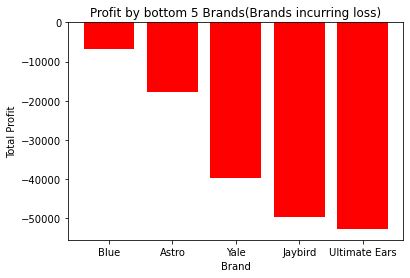

In [38]:
plt.title('Profit by bottom 5 Brands(Brands incurring loss)')
plt.xlabel('Brand')
plt.ylabel('Total Profit')
plt.bar(df2_BP['Brand'].iloc[-5:], df2_BP['Profit'].iloc[-5:], color = "red")

In [39]:
df2_P = df1.groupby(['ProductType'])['Profit'].sum()
df2_P = pd.DataFrame(df2_P)
df2_P

,Profit
ProductType,
2 In 1 Notebook,36988.624092
2 Way Radios,66.650576
AV Cables,1600.890598
AV Control Unit,11594.467143
AV Extenders,15616.909832
...,...
Xbox Console,1163.581233
Xbox Controller,343.029479
Xbox Game,17.560584


In [40]:
df2_PP = df2_P.sort_values(by='Profit', ascending=False)
df2_PP = df2_PP.reset_index()
df2_PP

,ProductType,Profit
0,Notebook Computers,1.901129e+06
1,Graphics Cards,1.471870e+06
2,Monitors,1.464498e+06
3,Home Notebook,5.968638e+05
4,Inkjet Printers,5.291295e+05
...,...,...
415,Gaming Headsets,-1.035176e+04
416,Network Routers,-1.658011e+04
417,Cable Locks,-2.036396e+04
418,Speakers,-3.473534e+04


<BarContainer object of 5 artists>

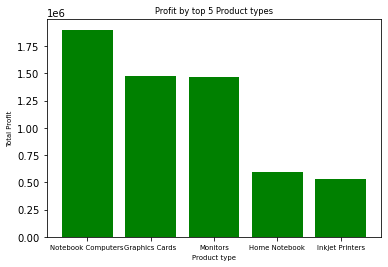

In [41]:
SMALL_SIZE = 6.9
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)    
plt.title('Profit by top 5 Product types')
plt.xlabel('Product type')
plt.ylabel('Total Profit')
plt.bar(df2_PP['ProductType'].iloc[:5], df2_PP['Profit'].iloc[:5], color = "green")
#le6 = 1000000

In [42]:
df2_P1 = df1.groupby(['ProductType'])['Revenue'].sum()
df2_P1 = pd.DataFrame(df2_P1)
df2_P1

,Revenue
ProductType,
2 In 1 Notebook,1.086588e+06
2 Way Radios,6.006323e+02
AV Cables,1.807124e+04
AV Control Unit,1.544787e+05
AV Extenders,1.357776e+05
...,...
Xbox Console,2.018570e+04
Xbox Controller,5.227616e+03
Xbox Game,1.912699e+02


In [43]:
df2_PR = df2_P1.sort_values(by='Revenue', ascending=False)
df2_PR = df2_PR.reset_index()
df2_PR

,ProductType,Revenue
0,Notebook Computers,1.084615e+08
1,Monitors,5.081544e+07
2,Professional Notebook,3.116824e+07
3,Home Notebook,2.839422e+07
4,Graphics Cards,2.753984e+07
...,...,...
415,Remote Management Adapters,1.794268e+01
416,Wall Plate,6.267923e+00
417,Office Equip Cleaning Products,6.005890e+00
418,Camera Lenses Or Filters,2.071525e-01


<BarContainer object of 5 artists>

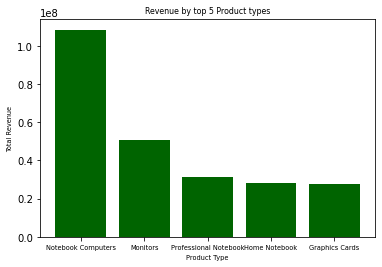

In [44]:
SMALL_SIZE = 6.6
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.title('Revenue by top 5 Product types')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.bar(df2_PR['ProductType'].iloc[:5], df2_PR['Revenue'].iloc[:5], color = "darkgreen")

<BarContainer object of 5 artists>

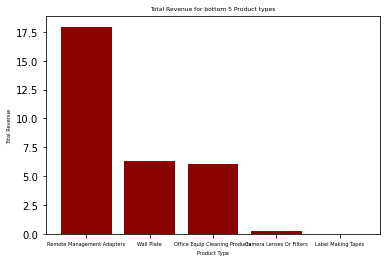

In [45]:
SMALL_SIZE = 5
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.title('Total Revenue for bottom 5 Product types')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.bar(df2_PR['ProductType'].iloc[-5:], df2_PR['Revenue'].iloc[-5:], color = "darkred")

<BarContainer object of 5 artists>

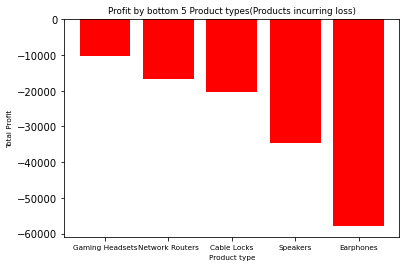

In [46]:
SMALL_SIZE = 7.3
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.title('Profit by bottom 5 Product types(Products incurring loss)')
plt.xlabel('Product type')
plt.ylabel('Total Profit')
plt.bar(df2_PP['ProductType'].iloc[-5:], df2_PP['Profit'].iloc[-5:], color = "red")

In [47]:
df2_Bpt = df1.groupby(['Brand','ProductType'])['Profit'].sum()
df2_Bpt = pd.DataFrame(df2_Bpt)

In [48]:
df2_Bpt

Profit
Brand         ProductType                                 
3M            Computer Display Glare Screens    305.443800
              Display Privacy Filters             6.823314
              Mouse/Trackballs                   68.517184
4Cabling      Network Cable                      24.514324
A10 Networks  Security Licence                15386.052614
...                                                    ...
dbramante1928 Screen Protectors                  10.442699
emporia       Mobile Phone                       41.384227
iFrogz        Earphones                        -424.660379
iZettle       Point Of Sale POS Terminal        101.198924
motorola      Mobile Phone                     6270.854828

[2168 rows x 1 columns]

In [49]:
df2_Bpt = df2_Bpt.sort_values(by='Profit', ascending=False)
df2_Bpt = df2_Bpt.reset_index()
df2_Bpt.head(10)

,Brand,ProductType,Profit
0,Dell,Notebook Computers,959929.862575
1,Lenovo,Notebook Computers,725732.128206
2,Dell,Monitors,580148.717382
3,Epson,Inkjet Printers,469237.314520
4,MSI,Graphics Cards,459485.942661
5,Gigabyte,Graphics Cards,449231.540602
6,Lenovo,Professional Desktop PC,361391.794682
7,Poly,Headset,339706.671761
8,Sandisk Professional,Desktop HDD,329035.259715
9,Lenovo,Chromebook,286173.541495


In [50]:
df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,SalesTeamName,P/L_label
0,02/04/2021,2,Microsoft,Operating System Software,254.213782,1.271048,Components North,1
1,02/04/2021,1,Microsoft,Utilities Software,191.682001,6.179373,Corporate North,1
2,02/04/2021,1,Unknown,IT Support Services,0.000000,-8.011783,Corporate North,0
3,02/04/2021,10,Lenovo,Notebook Computers,21362.979644,133.944138,Corporate South,1
4,02/04/2021,5,Lenovo,Notebook Computers,4344.370602,27.639497,Corporate South,1
...,...,...,...,...,...,...,...,...
488249,09/03/2023,2,Epson,Ink Cartridges,100.407113,9.711315,Office Automation,1
488250,09/03/2023,2,Epson,Ink Cartridges,207.935562,22.125938,Office Automation,1
488251,09/03/2023,2,Epson,Ink Cartridges,204.008019,23.369093,Office Automation,1
488252,09/03/2023,2,Epson,Ink Cartridges,206.068191,19.244544,Office Automation,1


In [51]:
df2_S = df1.groupby(['SalesTeamName'])['Profit'].sum()
df2_S = pd.DataFrame(df2_S)
df2_S

,Profit
SalesTeamName,
B2B Others,-3.124212e+03
Components North,4.540796e+06
Corporate North,3.225233e+06
Corporate South,3.756354e+06
DC Power North & NW,6.928686e+04
Office Automation,8.582908e+05
SMB 1 North,1.868903e+06
SMB 1 South,1.275364e+06


In [52]:
df2_S.index

Index(['B2B Others', 'Components North', 'Corporate North', 'Corporate South',
       'DC Power North & NW', 'Office Automation', 'SMB 1 North',
       'SMB 1 South'],
      dtype='object', name='SalesTeamName')

In [53]:
df2_SP = df2_S.sort_values(by='Profit', ascending=False)
df2_SP = df2_SP.reset_index()



In [54]:
df2_SP

,SalesTeamName,Profit
0,Components North,4.540796e+06
1,Corporate South,3.756354e+06
2,Corporate North,3.225233e+06
3,SMB 1 North,1.868903e+06
4,SMB 1 South,1.275364e+06
5,Office Automation,8.582908e+05
6,DC Power North & NW,6.928686e+04
7,B2B Others,-3.124212e+03


<BarContainer object of 4 artists>

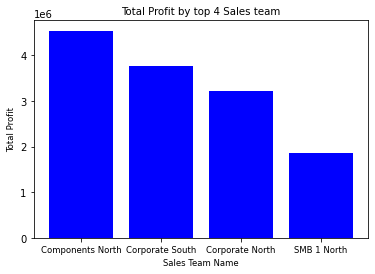

In [55]:
SMALL_SIZE = 8.5
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.title('Total Profit by top 4 Sales team')
plt.xlabel('Sales Team Name')
plt.ylabel('Total Profit')
plt.bar(df2_SP['SalesTeamName'].iloc[:4], df2_SP['Profit'].iloc[:4], color = "blue")

In [56]:
df2_S1 = df1.groupby(['SalesTeamName'])['Revenue'].sum()
df2_S1 = pd.DataFrame(df2_S1)
df2_S1

,Revenue
SalesTeamName,
B2B Others,4.202091e+02
Components North,9.359542e+07
Corporate North,1.013947e+08
Corporate South,1.901724e+08
DC Power North & NW,1.584021e+06
Office Automation,1.269846e+07
SMB 1 North,4.821021e+07
SMB 1 South,3.177561e+07


In [57]:
df2_S1.index

Index(['B2B Others', 'Components North', 'Corporate North', 'Corporate South',
       'DC Power North & NW', 'Office Automation', 'SMB 1 North',
       'SMB 1 South'],
      dtype='object', name='SalesTeamName')

In [58]:
df2_SR = df2_S1.sort_values(by='Revenue', ascending=False)
df2_SR = df2_SR.reset_index()

In [59]:
df2_SR

,SalesTeamName,Revenue
0,Corporate South,1.901724e+08
1,Corporate North,1.013947e+08
2,Components North,9.359542e+07
3,SMB 1 North,4.821021e+07
4,SMB 1 South,3.177561e+07
5,Office Automation,1.269846e+07
6,DC Power North & NW,1.584021e+06
7,B2B Others,4.202091e+02


<BarContainer object of 4 artists>

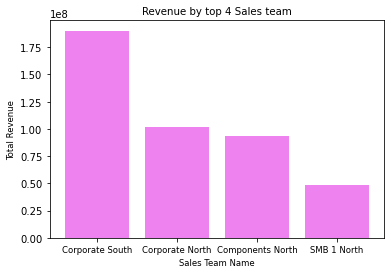

In [60]:
SMALL_SIZE = 8.5
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.title('Revenue by top 4 Sales team')
plt.xlabel('Sales Team Name')
plt.ylabel('Total Revenue')
plt.bar(df2_SR['SalesTeamName'].iloc[:4], df2_SR['Revenue'].iloc[:4], color = "violet")

In [61]:
Profit_per = (sum(df1['P/L_label'] == 1)/len(df1['P/L_label']))*100

In [62]:
Loss_per = (sum(df1['P/L_label'] == 0)/len(df1['P/L_label']))*100

Text(0.5, 0, 'Breakup of the Overall Profit and Loss statment for the company')

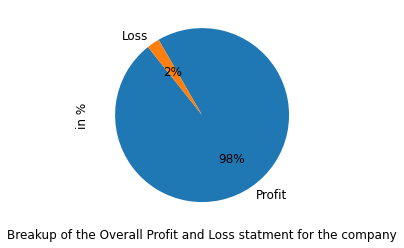

In [63]:
SMALL_SIZE = 12
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
labels = ('Profit', 'Loss')
sizes = [Profit_per,Loss_per ]

# bar chart setup
plt.pie(sizes, labels=labels, autopct='%1.f%%', counterclock=False, startangle=120)

# layout configuration
plt.ylabel('in %')
plt.xlabel('Breakup of the Overall Profit and Loss statment for the company')


In [64]:
df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,SalesTeamName,P/L_label
0,02/04/2021,2,Microsoft,Operating System Software,254.213782,1.271048,Components North,1
1,02/04/2021,1,Microsoft,Utilities Software,191.682001,6.179373,Corporate North,1
2,02/04/2021,1,Unknown,IT Support Services,0.000000,-8.011783,Corporate North,0
3,02/04/2021,10,Lenovo,Notebook Computers,21362.979644,133.944138,Corporate South,1
4,02/04/2021,5,Lenovo,Notebook Computers,4344.370602,27.639497,Corporate South,1
...,...,...,...,...,...,...,...,...
488249,09/03/2023,2,Epson,Ink Cartridges,100.407113,9.711315,Office Automation,1
488250,09/03/2023,2,Epson,Ink Cartridges,207.935562,22.125938,Office Automation,1
488251,09/03/2023,2,Epson,Ink Cartridges,204.008019,23.369093,Office Automation,1
488252,09/03/2023,2,Epson,Ink Cartridges,206.068191,19.244544,Office Automation,1


In [65]:
df1_qp = df1.groupby(['ProductType'])['Qty'].sum()
df1_qp = pd.DataFrame(df1_qp)
df1_qp

,Qty
ProductType,
2 In 1 Notebook,3088
2 Way Radios,25
AV Cables,885
AV Control Unit,184
AV Extenders,883
...,...
Xbox Console,87
Xbox Controller,149
Xbox Game,4


In [66]:
df1_qp = df1_qp.sort_values(by='Qty', ascending=False)
df1_qp = df1_qp.reset_index()
df1_qp

,ProductType,Qty
0,Monitors,360358
1,Headset,277245
2,Notebook Computers,170965
3,Memory Cards,139401
4,Notebook Cases,113083
...,...,...
415,Floor Steamer,1
416,Grill,1
417,Printer Belts,1
418,Comms Licencing,1


<BarContainer object of 5 artists>

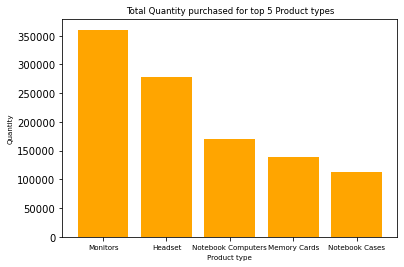

In [67]:
SMALL_SIZE = 7.1
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.title('Total Quantity purchased for top 5 Product types')
plt.xlabel('Product type')
plt.ylabel('Quantity')
plt.bar(df1_qp['ProductType'].iloc[:5], df1_qp['Qty'].iloc[:5], color = "orange")

In [68]:
df1_qb = df1.groupby(['Brand'])['Qty'].sum()
df1_qb = pd.DataFrame(df1_qb)
df1_qb

,Qty
Brand,
3M,31
4Cabling,15
A10 Networks,13
AKG,111
AOC,30156
...,...
dbramante1928,1
emporia,10
iFrogz,63


In [69]:
df1_qb = df1_qb.sort_values(by='Qty', ascending=False)
df1_qb = df1_qb.reset_index()
df1_qb

,Brand,Qty
0,Lenovo,516653
1,Dell,393163
2,Poly,297000
3,Startech,243754
4,Epson,126357
...,...,...
324,Marshall,1
325,My Arcade,1
326,AirCraft,1
327,Alcatel-Lucent Enterprise,1


<BarContainer object of 5 artists>

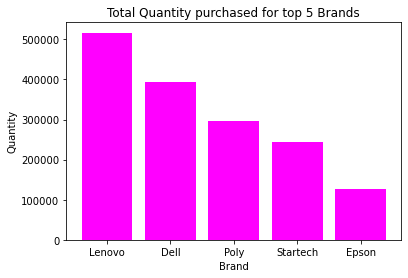

In [70]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.title('Total Quantity purchased for top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Quantity')
plt.bar(df1_qb['Brand'].iloc[:5], df1_qb['Qty'].iloc[:5], color = "magenta")

In [71]:
df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,SalesTeamName,P/L_label
0,02/04/2021,2,Microsoft,Operating System Software,254.213782,1.271048,Components North,1
1,02/04/2021,1,Microsoft,Utilities Software,191.682001,6.179373,Corporate North,1
2,02/04/2021,1,Unknown,IT Support Services,0.000000,-8.011783,Corporate North,0
3,02/04/2021,10,Lenovo,Notebook Computers,21362.979644,133.944138,Corporate South,1
4,02/04/2021,5,Lenovo,Notebook Computers,4344.370602,27.639497,Corporate South,1
...,...,...,...,...,...,...,...,...
488249,09/03/2023,2,Epson,Ink Cartridges,100.407113,9.711315,Office Automation,1
488250,09/03/2023,2,Epson,Ink Cartridges,207.935562,22.125938,Office Automation,1
488251,09/03/2023,2,Epson,Ink Cartridges,204.008019,23.369093,Office Automation,1
488252,09/03/2023,2,Epson,Ink Cartridges,206.068191,19.244544,Office Automation,1


In [72]:
df1['ShipDate'][0]

'02/04/2021'

In [73]:
df1["ShipDate"] = pd.to_datetime(df1["ShipDate"],infer_datetime_format=True)


In [74]:
df1['year'] = pd.DatetimeIndex(df1['ShipDate']).year
df1['year']

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
488249    2023
488250    2023
488251    2023
488252    2023
488253    2023
Name: year, Length: 461603, dtype: int64

In [75]:
df1['month'] = pd.DatetimeIndex(df1['ShipDate']).month
df1['month']

0          2
1          2
2          2
3          2
4          2
          ..
488249     9
488250     9
488251     9
488252     9
488253    10
Name: month, Length: 461603, dtype: int64

In [76]:
df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,SalesTeamName,P/L_label,year,month
0,2021-02-04,2,Microsoft,Operating System Software,254.213782,1.271048,Components North,1,2021,2
1,2021-02-04,1,Microsoft,Utilities Software,191.682001,6.179373,Corporate North,1,2021,2
2,2021-02-04,1,Unknown,IT Support Services,0.000000,-8.011783,Corporate North,0,2021,2
3,2021-02-04,10,Lenovo,Notebook Computers,21362.979644,133.944138,Corporate South,1,2021,2
4,2021-02-04,5,Lenovo,Notebook Computers,4344.370602,27.639497,Corporate South,1,2021,2
...,...,...,...,...,...,...,...,...,...,...
488249,2023-09-03,2,Epson,Ink Cartridges,100.407113,9.711315,Office Automation,1,2023,9
488250,2023-09-03,2,Epson,Ink Cartridges,207.935562,22.125938,Office Automation,1,2023,9
488251,2023-09-03,2,Epson,Ink Cartridges,204.008019,23.369093,Office Automation,1,2023,9
488252,2023-09-03,2,Epson,Ink Cartridges,206.068191,19.244544,Office Automation,1,2023,9


In [77]:
df1sv = df1.to_csv('sv1df.csv')

In [78]:
df1_D = df1.groupby(['year'])['Profit'].sum()
df1_D = pd.DataFrame(df1_D)
df1_D

,Profit
year,
2021,7.210541e+06
2022,6.498106e+06
2023,1.882456e+06


In [79]:
df1_DP = df1_D.sort_values(by='Profit', ascending=False)
df1_DP = df1_DP.reset_index()
df1_DP

,year,Profit
0,2021,7.210541e+06
1,2022,6.498106e+06
2,2023,1.882456e+06


<BarContainer object of 3 artists>

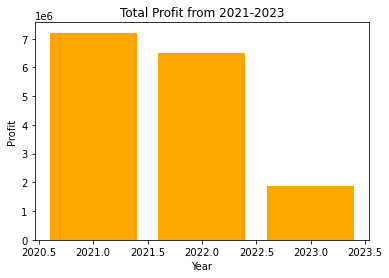

In [80]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.title('Total Profit from 2021-2023')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.bar(df1_DP['year'], df1_DP['Profit'], color = "orange")

In [81]:
df1_DQ = df1.groupby(['year'])['Qty'].sum()
df1_DQ = pd.DataFrame(df1_DQ)
df1_DQ

,Qty
year,
2021,1642568
2022,1405216
2023,451324


In [82]:

df1_DQ = df1_DQ.reset_index()
df1_DQ

,year,Qty
0,2021,1642568
1,2022,1405216
2,2023,451324


<BarContainer object of 3 artists>

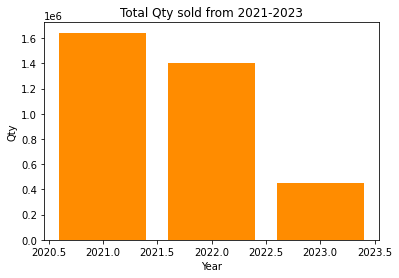

In [83]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.title('Total Qty sold from 2021-2023')
plt.xlabel('Year')
plt.ylabel('Qty')
plt.bar(df1_DQ['year'], df1_DQ['Qty'], color = "darkorange")

In [84]:
df1_M1 = df1.groupby(['month','year'])['Profit'].sum()
df1_M1 = pd.DataFrame(df1_M1)
df1_M1

Profit
month year              
1     2021  1.101827e+05
      2022  7.729493e+05
      2023  5.972773e+05
2     2021  2.024819e+05
      2022  5.189313e+05
      2023  5.215003e+05
3     2021  9.684009e+04
      2022  1.631658e+05
      2023  9.724035e+04
4     2021  1.131013e+06
      2022  1.938535e+05
      2023  2.675926e+04
5     2021  7.002954e+05
      2022  4.103640e+05
      2023  3.592248e+04
6     2021  9.790687e+05
      2022  8.057968e+05
      2023  1.127005e+05
7     2021  1.010869e+06
      2022  7.141826e+05
      2023  8.640840e+04
8     2021  3.040286e+05
      2022  5.340477e+05
      2023  8.547765e+04
9     2021  7.627530e+05
      2022  2.699822e+05
      2023  1.007682e+05
10    2021  6.829560e+05
      2022  6.819318e+05
      2023  1.252333e+05
11    2021  6.950239e+05
      2022  7.915719e+05
      2023  4.743491e+04
12    2021  5.350281e+05
      2022  6.413288e+05
      2023  4.573342e+04

In [85]:
df1_M2 = df1.groupby(['year','month'])['Profit'].sum()
df1_M2 = pd.DataFrame(df1_M2)
df1_M2

Profit
year month              
2021 1      1.101827e+05
     2      2.024819e+05
     3      9.684009e+04
     4      1.131013e+06
     5      7.002954e+05
     6      9.790687e+05
     7      1.010869e+06
     8      3.040286e+05
     9      7.627530e+05
     10     6.829560e+05
     11     6.950239e+05
     12     5.350281e+05
2022 1      7.729493e+05
     2      5.189313e+05
     3      1.631658e+05
     4      1.938535e+05
     5      4.103640e+05
     6      8.057968e+05
     7      7.141826e+05
     8      5.340477e+05
     9      2.699822e+05
     10     6.819318e+05
     11     7.915719e+05
     12     6.413288e+05
2023 1      5.972773e+05
     2      5.215003e+05
     3      9.724035e+04
     4      2.675926e+04
     5      3.592248e+04
     6      1.127005e+05
     7      8.640840e+04
     8      8.547765e+04
     9      1.007682e+05
     10     1.252333e+05
     11     4.743491e+04
     12     4.573342e+04

In [86]:
df1_M1 = df1_M1.reset_index()
df1_M1

,month,year,Profit
0,1,2021,1.101827e+05
1,1,2022,7.729493e+05
2,1,2023,5.972773e+05
3,2,2021,2.024819e+05
4,2,2022,5.189313e+05
5,2,2023,5.215003e+05
6,3,2021,9.684009e+04
7,3,2022,1.631658e+05
8,3,2023,9.724035e+04
9,4,2021,1.131013e+06


<BarContainer object of 12 artists>

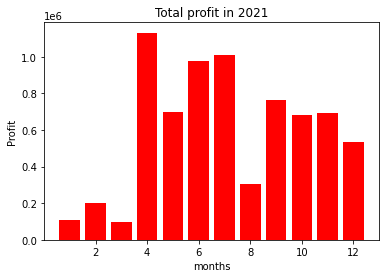

In [87]:
df1_21 = df1_M1[df1_M1['year'] == 2021]
SMALL_SIZE = 10
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.title('Total profit in 2021')
plt.xlabel('months')
plt.ylabel('Profit')
plt.bar(df1_21['month'], df1_21['Profit'], color = "red")

<BarContainer object of 12 artists>

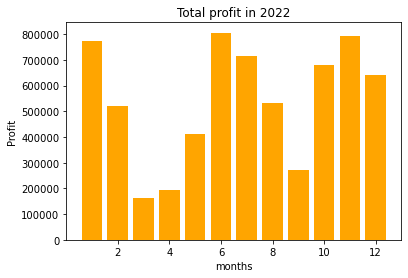

In [88]:
df1_21 = df1_M1[df1_M1['year'] == 2022]
SMALL_SIZE = 10
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.title('Total profit in 2022')
plt.xlabel('months')
plt.ylabel('Profit')
plt.bar(df1_21['month'], df1_21['Profit'], color = "orange")

<BarContainer object of 12 artists>

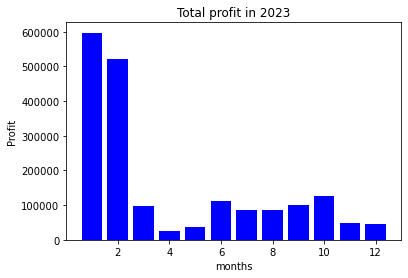

In [89]:
df1_21 = df1_M1[df1_M1['year'] == 2023]
SMALL_SIZE = 10
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.title('Total profit in 2023')
plt.xlabel('months')
plt.ylabel('Profit')
plt.bar(df1_21['month'], df1_21['Profit'], color = "blue")

In [90]:
df1

,ShipDate,Qty,Brand,ProductType,Revenue,Profit,SalesTeamName,P/L_label,year,month
0,2021-02-04,2,Microsoft,Operating System Software,254.213782,1.271048,Components North,1,2021,2
1,2021-02-04,1,Microsoft,Utilities Software,191.682001,6.179373,Corporate North,1,2021,2
2,2021-02-04,1,Unknown,IT Support Services,0.000000,-8.011783,Corporate North,0,2021,2
3,2021-02-04,10,Lenovo,Notebook Computers,21362.979644,133.944138,Corporate South,1,2021,2
4,2021-02-04,5,Lenovo,Notebook Computers,4344.370602,27.639497,Corporate South,1,2021,2
...,...,...,...,...,...,...,...,...,...,...
488249,2023-09-03,2,Epson,Ink Cartridges,100.407113,9.711315,Office Automation,1,2023,9
488250,2023-09-03,2,Epson,Ink Cartridges,207.935562,22.125938,Office Automation,1,2023,9
488251,2023-09-03,2,Epson,Ink Cartridges,204.008019,23.369093,Office Automation,1,2023,9
488252,2023-09-03,2,Epson,Ink Cartridges,206.068191,19.244544,Office Automation,1,2023,9


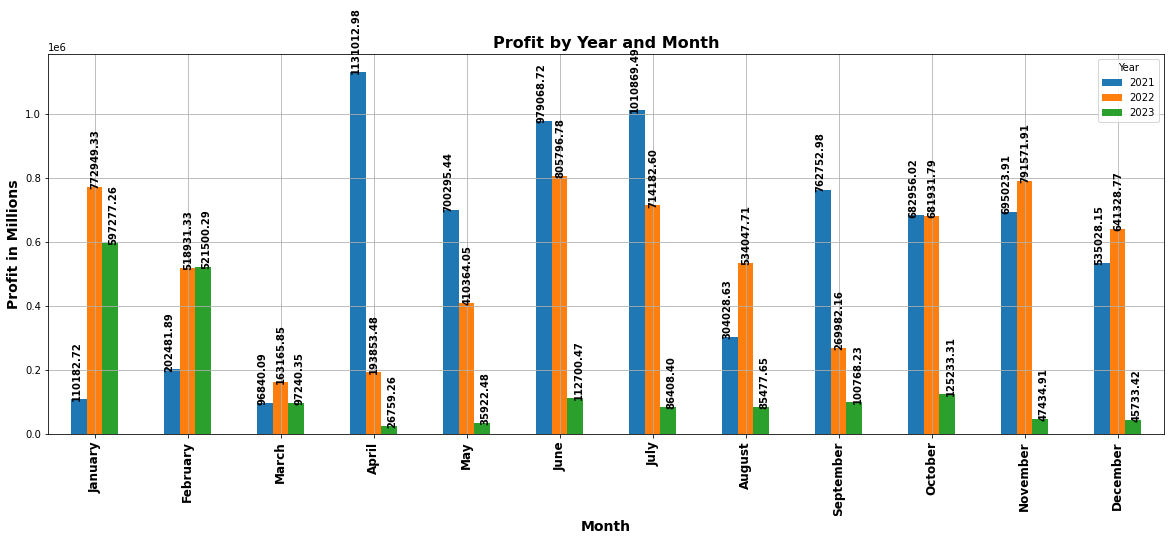

In [91]:
pivot = df1.pivot_table(values='Profit', index='month', columns='year', aggfunc='sum')

 

ax = pivot.plot(kind='bar', figsize=(20, 7), grid=True)

ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June',

                    'July', 'August', 'September', 'October', 'November', 'December'],

                   fontweight='bold', fontsize=12)

plt.xlabel('Month', fontweight='bold', fontsize=14)

plt.ylabel('Profit in Millions', fontweight='bold', fontsize=14)

plt.title('Profit by Year and Month', fontweight='bold', fontsize=16)

for i, j in enumerate(pivot.columns):
    for x, y in enumerate(pivot[j]):
        plt.text(x + i/5 - 0.25, y + 2, f"{y:.02f}", color='black', fontweight='bold', rotation=90) #you can use round, to display rounded off values

 
ax.legend(title='Year', loc='upper left')

ax.legend().set_title('Year')

 

plt.show()

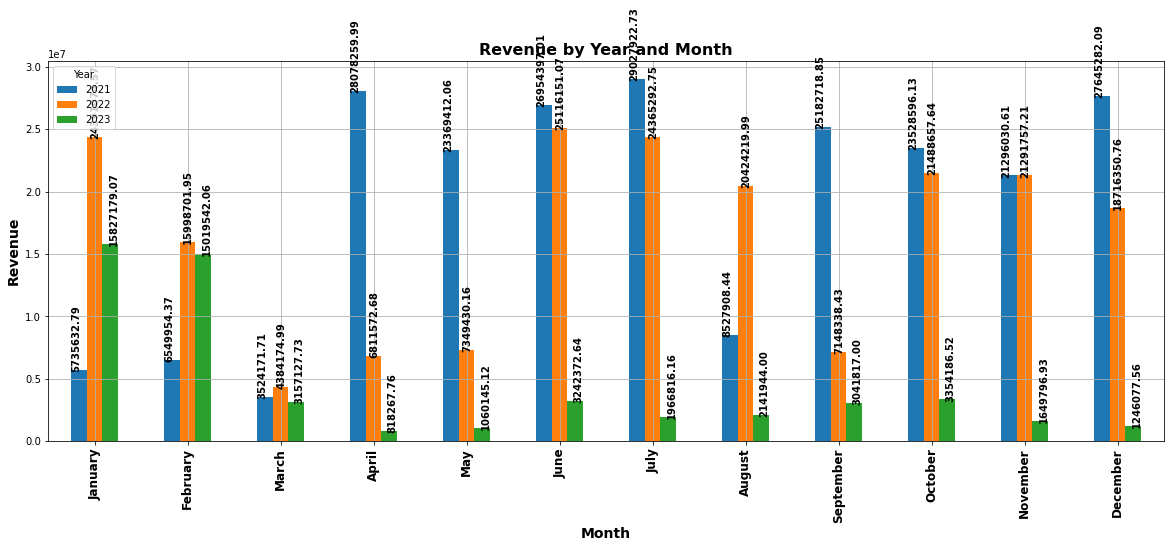

In [92]:
pivot_1 = df1.pivot_table(values='Revenue', index='month', columns='year', aggfunc='sum')

 

ax = pivot_1.plot(kind='bar', figsize=(20, 7), grid=True)

ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June',

                    'July', 'August', 'September', 'October', 'November', 'December'],

                   fontweight='bold', fontsize=12)

plt.xlabel('Month', fontweight='bold', fontsize=14)

plt.ylabel('Revenue', fontweight='bold', fontsize=14)

plt.title('Revenue by Year and Month', fontweight='bold', fontsize=16)

for i, j in enumerate(pivot_1.columns):
    for x, y in enumerate(pivot_1[j]):
        plt.text(x + i/5 - 0.25, y + 2, f"{y:.02f}", color='black', fontweight='bold', rotation=90) #you can use round, to display rounded off values

 
ax.legend(title='Year', loc='upper left')

ax.legend().set_title('Year')

 

plt.show()

In [93]:
df1['SalesTeamName'].unique()

array(['Components North', 'Corporate North', 'Corporate South',
       'SMB 1 South', 'SMB 1 North', 'Office Automation',
       'DC Power North & NW', 'B2B Others'], dtype=object)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


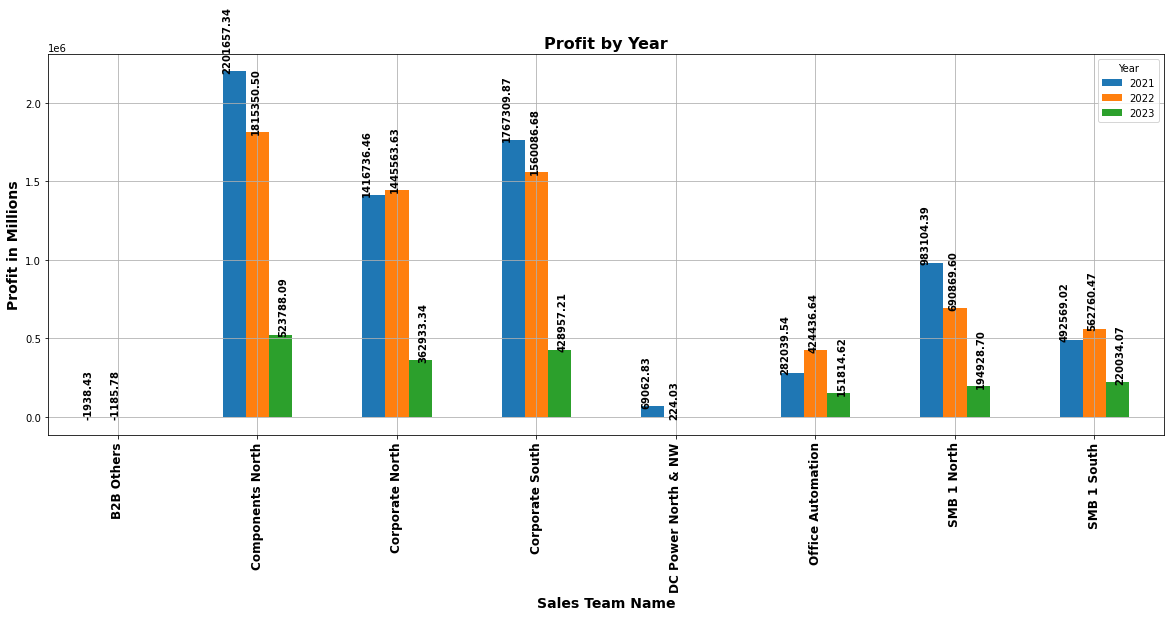

In [94]:
pivot_2 = df1.pivot_table(values='Profit', index='SalesTeamName', columns='year', aggfunc='sum')

 

ax = pivot_2.plot(kind='bar', figsize=(20, 7), grid=True)

ax.set_xticklabels(['B2B Others', 'Components North', 'Corporate North', 'Corporate South',
       'DC Power North & NW', 'Office Automation', 'SMB 1 North',
       'SMB 1 South'],

                   fontweight='bold', fontsize=12)

plt.xlabel('Sales Team Name', fontweight='bold', fontsize=14)

plt.ylabel('Profit in Millions', fontweight='bold', fontsize=14)

plt.title('Profit by Year', fontweight='bold', fontsize=16)

for i, j in enumerate(pivot_2.columns):
    for x, y in enumerate(pivot_2[j]):
        plt.text(x + i/5 - 0.25, y + 2, f"{y:.02f}", color='black', fontweight='bold', rotation=90) #you can use round, to display rounded off values

 
ax.legend(title='Year', loc='upper left')

ax.legend().set_title('Year')

 

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


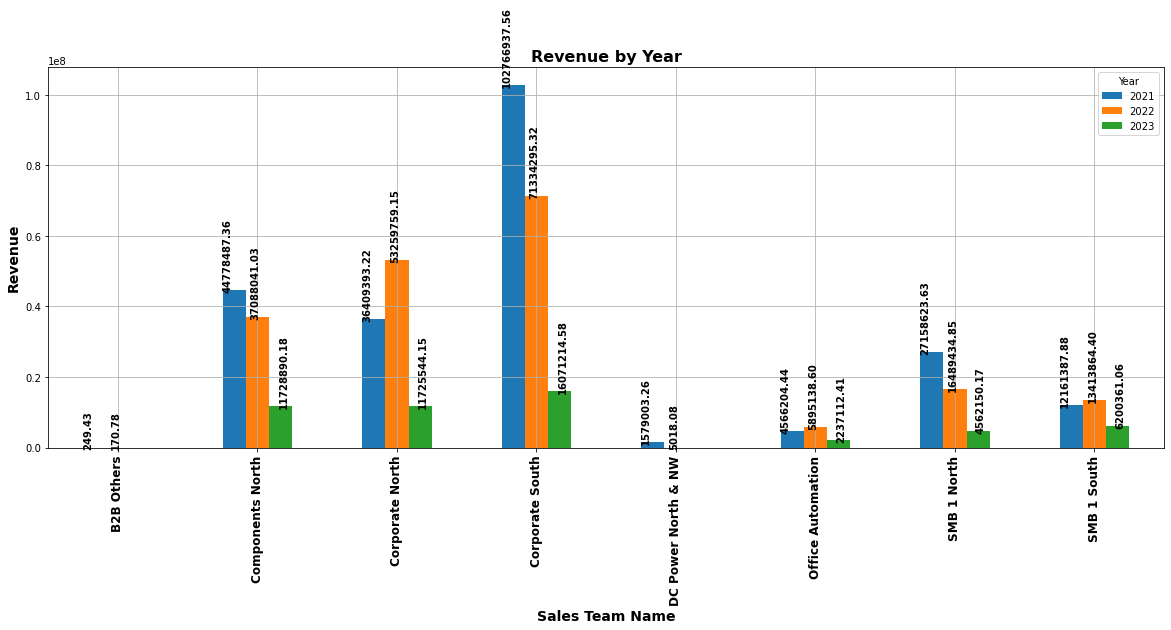

In [95]:
pivot_2 = df1.pivot_table(values='Revenue', index='SalesTeamName', columns='year', aggfunc='sum')

 

ax = pivot_2.plot(kind='bar', figsize=(20, 7), grid=True)

ax.set_xticklabels(['B2B Others', 'Components North', 'Corporate North', 'Corporate South',
       'DC Power North & NW', 'Office Automation', 'SMB 1 North',
       'SMB 1 South'],

                   fontweight='bold', fontsize=12)

plt.xlabel('Sales Team Name', fontweight='bold', fontsize=14)

plt.ylabel('Revenue', fontweight='bold', fontsize=14)

plt.title('Revenue by Year', fontweight='bold', fontsize=16)

for i, j in enumerate(pivot_2.columns):
    for x, y in enumerate(pivot_2[j]):
        plt.text(x + i/5 - 0.25, y + 2, f"{y:.02f}", color='black', fontweight='bold', rotation=90) #you can use round, to display rounded off values

 
ax.legend(title='Year', loc='upper left')

ax.legend().set_title('Year')

 

plt.show()

# PART 2 (Data Modelling)

In [96]:
df_upd = df

In [97]:
df_upd

,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName
0,100002803,0002913843,10,02/04/2021,2,Microsoft,Operating System Software,1000477.0,254.213782,1.271048,0.0,Components North
1,100003323,0002918083,50,02/04/2021,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.0,Corporate North
2,100016168,0002916878,20,02/04/2021,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.0,Corporate North
3,100001590,0002470475,10,02/04/2021,10,Lenovo,Notebook Computers,1000133.0,21362.979644,133.944138,0.0,Corporate South
4,100001590,0002544987,10,02/04/2021,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.0,Corporate South
...,...,...,...,...,...,...,...,...,...,...,...,...
488706,100010912,60584191.0,10,10/03/2023,-1,Lightwave RF,Smart Home Lighting,1000592.0,-53.174831,-4.746284,0.0,SMB 1 North
488707,100013325,60583918.0,10,10/03/2023,-1,Sandisk Professional,Desktop HDD,1000043.0,-137.487216,-9.413256,0.0,Components North
488708,100014212,60584292.0,10,10/03/2023,-1,Epson,Ink Cartridges,1000056.0,-136.971448,-11.899225,0.0,Office Automation
488709,100015609,60584541.0,10,10/03/2023,-1,Zanussi,Vacuum Cleaners,1002099.0,-50.589045,10.080643,0.0,Corporate North


In [98]:
#removing commas from the values in the 'Qty' column
df_upd = df_upd.replace(',','', regex=True)
df_upd['Qty'] = pd.to_numeric(df_upd['Qty'])
df_upd = df_upd[df_upd['Qty'] >= 0]
df_upd



,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName
0,100002803,0002913843,10,02/04/2021,2,Microsoft,Operating System Software,1000477.0,254.213782,1.271048,0.00,Components North
1,100003323,0002918083,50,02/04/2021,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.00,Corporate North
2,100016168,0002916878,20,02/04/2021,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.00,Corporate North
3,100001590,0002470475,10,02/04/2021,10,Lenovo,Notebook Computers,1000133.0,21362.979644,133.944138,0.00,Corporate South
4,100001590,0002544987,10,02/04/2021,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.00,Corporate South
...,...,...,...,...,...,...,...,...,...,...,...,...
488249,100010479,1006583100.0,30,09/03/2023,2,Epson,Ink Cartridges,1000056.0,100.407113,9.711315,5.11,Office Automation
488250,100010479,1006583100.0,40,09/03/2023,2,Epson,Ink Cartridges,1000056.0,207.935562,22.125938,3.02,Office Automation
488251,100010479,1006583100.0,50,09/03/2023,2,Epson,Ink Cartridges,1000056.0,204.008019,23.369093,3.00,Office Automation
488252,100010479,1006583100.0,60,09/03/2023,2,Epson,Ink Cartridges,1000056.0,206.068191,19.244544,2.96,Office Automation


In [99]:
#item category segmentation(usig the product type column) using K-means clustering


In [100]:
#applying tf-idf on product type column since K-means clustering only takes numerical data as input
vectorizer = TfidfVectorizer(use_idf = True)
# Transform features
X_tfidf = vectorizer.fit_transform(df_upd['ProductType'])



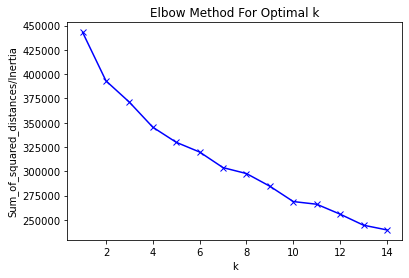

In [101]:
# Use elbow criterion for determining number of category clusters.
squared_dist_sum = []
K = range(1,15)
for k in K:
    km = MiniBatchKMeans(n_clusters=k, max_iter=4000, n_init=500, random_state=1000) 
    km = km.fit(X_tfidf)
    squared_dist_sum.append(km.inertia_)

plt.plot(K, squared_dist_sum, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [102]:
#According to the elbow method, the most promising values for the number of clusters are 4, 6, and 8 and there can be many others as we increase the range of K.
#set the number of clusters 
k_true = 8
#performing k means clustering
km_model = MiniBatchKMeans(n_clusters=k_true, init='k-means++', max_iter=4000, n_init=500, random_state=1000)
km_model.fit(X_tfidf)

#getting cluster for each product category
labels = km_model.labels_
tf_idf_prod_categ = pd.DataFrame(list(zip(df_upd['ProductType'],labels)),columns = ['ProductType','category'])

# print number of items per cluster
print(tf_idf_prod_categ['category'].value_counts())

5    249005
1     67163
2     55079
4     22389
3     20276
7     19962
0     17004
6     10725
Name: category, dtype: int64


Category: 0


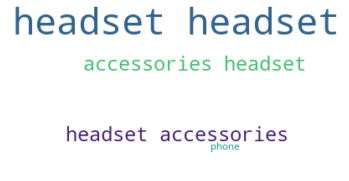

Category: 1


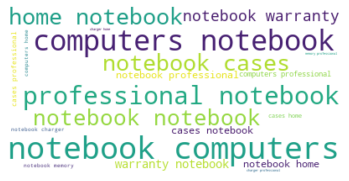

Category: 2


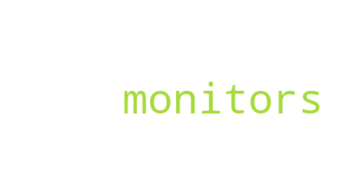

Category: 3


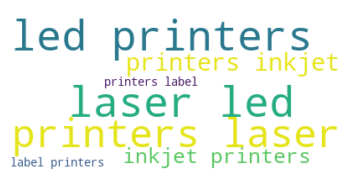

Category: 4


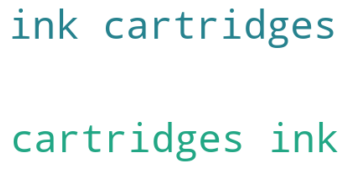

Category: 5


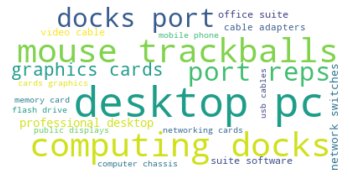

Category: 6


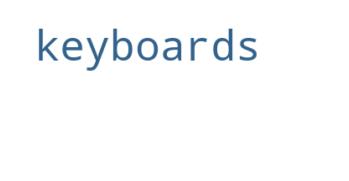

Category: 7


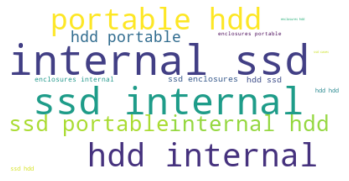

In [103]:
#creating word cloud for each cluster
for k in range(0,k_true):
    word = tf_idf_prod_categ[tf_idf_prod_categ.category==k]
    text=word['ProductType'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(text)
    print('Category: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    

In [104]:
df_upd

,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName
0,100002803,0002913843,10,02/04/2021,2,Microsoft,Operating System Software,1000477.0,254.213782,1.271048,0.00,Components North
1,100003323,0002918083,50,02/04/2021,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.00,Corporate North
2,100016168,0002916878,20,02/04/2021,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.00,Corporate North
3,100001590,0002470475,10,02/04/2021,10,Lenovo,Notebook Computers,1000133.0,21362.979644,133.944138,0.00,Corporate South
4,100001590,0002544987,10,02/04/2021,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.00,Corporate South
...,...,...,...,...,...,...,...,...,...,...,...,...
488249,100010479,1006583100.0,30,09/03/2023,2,Epson,Ink Cartridges,1000056.0,100.407113,9.711315,5.11,Office Automation
488250,100010479,1006583100.0,40,09/03/2023,2,Epson,Ink Cartridges,1000056.0,207.935562,22.125938,3.02,Office Automation
488251,100010479,1006583100.0,50,09/03/2023,2,Epson,Ink Cartridges,1000056.0,204.008019,23.369093,3.00,Office Automation
488252,100010479,1006583100.0,60,09/03/2023,2,Epson,Ink Cartridges,1000056.0,206.068191,19.244544,2.96,Office Automation


In [105]:
tf_idf_prod_categ


,ProductType,category
0,Operating System Software,5
1,Utilities Software,5
2,IT Support Services,5
3,Notebook Computers,1
4,Notebook Computers,1
...,...,...
461598,Ink Cartridges,4
461599,Ink Cartridges,4
461600,Ink Cartridges,4
461601,Ink Cartridges,4


In [106]:
#clustering based on Recency, Frequency, Monetary Value (RFM)
#Recency is the number of days from the last invoice date to the most current InvoiceDate of the given dataset (2023-12-02)
#Frequency is the number of days from first invoice date to last invoice date divided by the number of invoices
#Monetary value is the average cost

In [107]:
#customer segmentation based on recency,frequency and monetary value to understand the value of the customers 
df_upd["ShipDate"] = pd.to_datetime(df_upd["ShipDate"],infer_datetime_format=True)


In [108]:
print (df_upd['ShipDate'].min())
print (df_upd['ShipDate'].max())
max_date= df_upd['ShipDate'].max()


2021-01-06 00:00:00
2023-12-02 00:00:00


In [109]:
#Recency is the number of days from last InvoiceDate to most current InvoiceDate of the dataset (2023-12-02),
#Frequency is the number of days from first InvoiceDate to last InvoiceDate divided by the number of invoices
#Monetary value is how much the custoemr is spending which is equal to the revenue/sales given in this dataset

In [110]:
customer_rfm= df_upd.groupby(['CustomerId']).agg({'SalesOrderNumber':'nunique', 
                                                         'Revenue':'sum',
                                                         'ShipDate':['min','max']})
customer_rfm.columns=['Sales_order_num_count','total_cost(Revenue)','min_date','max_date']

In [111]:
customer_rfm

,Sales_order_num_count,total_cost(Revenue),min_date,max_date
CustomerId,,,,
100000003,6,615.122944,2021-02-06,2023-01-30
100000005,3,1130.302162,2021-04-13,2022-12-10
100000015,4,4133.652421,2021-04-23,2022-09-08
100000029,1,57.950596,2022-10-21,2022-10-21
100000034,380,103665.553755,2021-04-14,2023-12-01
...,...,...,...,...
100024529,2,1037.821840,2023-02-24,2023-02-27
100024593,1,853.128159,2023-02-03,2023-02-03
100024597,2,601.152233,2023-06-03,2023-10-03


In [112]:
customer_rfm['recency(In Days)']= max_date - customer_rfm['max_date']
customer_rfm['recency(In Days)'] = customer_rfm['recency(In Days)'].dt.days

customer_rfm['days'] = max_date - customer_rfm['min_date']
customer_rfm['days'] = customer_rfm['days'].dt.days

customer_rfm['frequency'] = customer_rfm['days']/customer_rfm['Sales_order_num_count']
customer_rfm['monetary_value'] = customer_rfm['total_cost(Revenue)']/customer_rfm['Sales_order_num_count']

customer_rfm = customer_rfm.drop(['Sales_order_num_count','total_cost(Revenue)','days','min_date','max_date'],axis=1)
customer_rfm.head(10)


,recency(In Days),frequency,monetary_value
CustomerId,,,
100000003,306,171.500000,102.520491
100000005,357,321.000000,376.767387
100000015,450,238.250000,1033.413105
100000029,407,407.000000,57.950596
100000034,1,2.531579,272.804089
100000037,941,941.000000,457.207885
100000038,92,84.727273,447.448319
100000039,470,470.000000,198.935672
100000046,60,27.272727,183.573587


In [113]:
#standardising the column values bring down all the features to a common scale without distorting the differences in the range of the values.
scaler = StandardScaler()
X_std = scaler.fit_transform(customer_rfm)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramDa

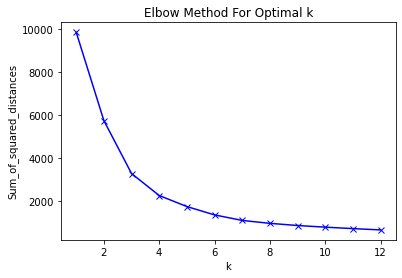

In [114]:
Sum_of_squared_distances = []
K = range(1,13)
for k in K:
    km_rfm = KMeans(n_clusters=k, max_iter=5000, n_init=500, random_state=100,n_jobs= -1) 
    km_rfm = km_rfm.fit(X_std)
    Sum_of_squared_distances.append(km_rfm.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [115]:
# set number of clusters
true_k_rfm = 4
# perform k-means clustering 
model_rfm = KMeans(n_clusters=true_k_rfm, max_iter=5000, n_init=500, random_state=100,n_jobs= -1) 
model_rfm.fit(X_std)
# append cluster assignment for each item set
customer_rfm['cluster']=model_rfm.labels_
# print number of items per cluster
print(customer_rfm['cluster'].value_counts())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0    1716
1    1110
2     447
3      10
Name: cluster, dtype: int64


In [116]:
customer_rfm

,recency(In Days),frequency,monetary_value,cluster
CustomerId,,,,
100000003,306,171.500000,102.520491,0
100000005,357,321.000000,376.767387,1
100000015,450,238.250000,1033.413105,1
100000029,407,407.000000,57.950596,1
100000034,1,2.531579,272.804089,0
...,...,...,...,...
100024529,278,140.500000,518.910920,0
100024593,302,302.000000,853.128159,1
100024597,60,91.000000,300.576116,0


In [117]:
def cluster_profile_RFM_country(customer_clustering,cut_off=0):
  ''' profile clusters '''

  customer_clusters=customer_clustering.reset_index().groupby(['cluster']).agg({'CustomerId':['count'], 
                                                         'recency(In Days)':'median',
                                                         'frequency':'median',
                                                         'monetary_value':'median'})
  idx= customer_clusters['CustomerId']>=cut_off
  idx=idx['count'].to_list()
  customer_clusters=customer_clusters[idx]
  print(customer_clusters)
  print('\n')
  customer_clusters_sum=customer_clusters.sum(axis=0)
    
  
  print('HEAT map')
  print('Numbers are column percentages')
  sns.heatmap(customer_clusters.drop(['CustomerId'],axis=1), annot=True,  linewidths=.5)

     
            

        CustomerId recency(In Days)   frequency monetary_value
             count           median      median         median
cluster                                                       
0             1716            121.0   46.618182     874.411691
1             1110            483.0  245.666667     603.127538
2              447            850.0  796.000000     424.720286


HEAT map
Numbers are column percentages


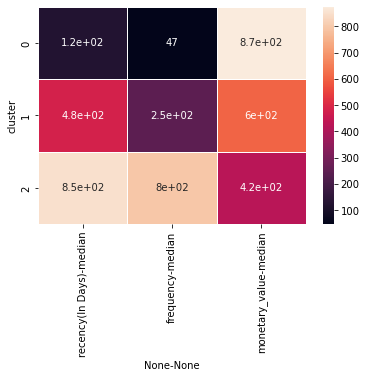

In [118]:
cluster_profile_RFM_country(customer_rfm,cut_off = 100)